In [1]:
import tensorflow as tf

In [2]:
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet', include_top = False)

Using TensorFlow backend.
C:\Users\USER\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [3]:
import sys
print(sys.version)
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import scipy
from ipywidgets import interact, widgets
from scipy import stats

3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 18:50:55) [MSC v.1915 64 bit (AMD64)]


In [4]:
train_X = np.load('Xmatrix.npy')
train_Y = np.load('Ylabels.npy')
print('Training data shape : ', train_X.shape, train_Y.shape)

# set dimensions of a small sized image for a single data point

height = 224
width = 224
numGrids = 12 

Training data shape :  (4320, 150528) (4320, 1)


In [5]:
%store height

Stored 'height' (int)


In [29]:
# X is the full training data Matrix, e.g. (4320, 150528), i is the index of the image that you want to plot
def plotFull(X, i):
    allPieces = train_X.reshape(-1, height, width, 3)
    imagePieces = allPieces[numGrids**2*i:numGrids**2*(i + 1)]
    if np.ravel(imagePieces)[0] > 1:
        imagePieces = imagePieces / 255.
    fullImage = reconstructPic(imagePieces, numGrids)
    plt.imshow(fullImage)
    
# X is (numGrids**2, height * width), this method return a high resolution picture with the image pieces
def reconstructPic(X, numGrids):  
    reconstruction = np.zeros((len(X[0]) * numGrids, (len(X[0][0])) * numGrids, 3))
    width = len(X[0][0])
    imgwidth = int(len(X[0][0]) * numGrids)
    height = len(X[0])
    imgheight = int(len(X[0]) * numGrids)
    for i in range(0,imgheight,height):
        for j in range(0,imgwidth,width):
            result = X[int(numGrids*i/len(X[0])) +int(j/len(X[0][0]))].reshape(height, width, -1)
            reconstruction[i:i+height, j:j+width,:] = result
    return reconstruction

In [30]:
interact(lambda lam: plotFull(train_X, lam), lam=(0, int(len(train_X)/numGrids**2)-1))

interactive(children=(IntSlider(value=14, description='lam', max=29), Output()), _dom_classes=('widget-interac…

<function __main__.<lambda>(lam)>

In [124]:
from sklearn.model_selection import train_test_split

# split dataset into 80% training data points and 20% testing data points

train_Y_one_hot = to_categorical(train_Y)
train_X,test_X,train_label,test_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=12)

print('Training data shape : ', train_X.shape, train_label.shape, 'Testing data shape: ', test_X.shape, test_label.shape)

Training data shape :  (3456, 224, 224, 3) (3456, 2) Testing data shape:  (864, 224, 224, 3) (864, 2)


In [33]:
# identify the number of classes and 

classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0. 1.]


In [64]:
print("Python list train_X with length", train_X.shape, "is converted to a numpy array")

train_X = train_X.reshape(-1, height,width, 3)
print(train_X.shape)

train_X = train_X.astype('float32')

if np.ravel(train_X)[0] > 1:
    train_X = train_X / 255.

train_Y_one_hot = to_categorical(train_Y)
print('Original label:\n', train_Y[0:6])
print('After conversion to one-hot:\n', train_Y_one_hot[0:6])

Python list train_X with length (3456, 224, 224, 3) is converted to a numpy array
(3456, 224, 224, 3)
Original label:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
After conversion to one-hot:
 [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


Text(0.5, 1.0, 'Ground Truth : [1.]')

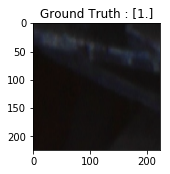

In [71]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[143,:,:])
plt.title("Ground Truth : {}".format(train_Y[0]))

In [125]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_label, test_size=0.2, random_state=13)
print('Training data shape : ', train_X.shape, train_label.shape, 'Validing data shape: ', valid_X.shape, valid_label.shape)

Training data shape :  (2764, 224, 224, 3) (2764, 2) Validing data shape:  (692, 224, 224, 3) (692, 2)


In [111]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [121]:
batch_size = 64
epochs = 1
num_classes = 2

johnnychan_model = Sequential()
johnnychan_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(height,width,3)))
johnnychan_model.add(LeakyReLU(alpha=0.1))
johnnychan_model.add(MaxPooling2D((2, 2),padding='same'))
johnnychan_model.add(Dropout(0.25))
johnnychan_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
johnnychan_model.add(LeakyReLU(alpha=0.1))
johnnychan_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
johnnychan_model.add(Dropout(0.25))
johnnychan_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
johnnychan_model.add(LeakyReLU(alpha=0.1))                  
johnnychan_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
johnnychan_model.add(Dropout(0.4))
johnnychan_model.add(Flatten())
johnnychan_model.add(Dense(128, activation='linear'))
johnnychan_model.add(LeakyReLU(alpha=0.1))           
johnnychan_model.add(Dropout(0.3))
johnnychan_model.add(Dense(num_classes, activation='softmax'))

In [113]:
johnnychan_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [114]:
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet',include_top = False)

C:\Users\USER\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [115]:
from keras.layers import Dense,GlobalAveragePooling2D
x=mobilenet_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

In [116]:
trans_model=Model(inputs=mobilenet_model.input,outputs=preds)

In [117]:
for layer in trans_model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in trans_model.layers[:90]:
    layer.trainable=False
for layer in trans_model.layers[90:]:
    layer.trainable=True

In [118]:
trans_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [119]:
trans_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

In [120]:
from time import time
from keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir="/tmp/convNet".format(time()))

In [126]:
waste_train = trans_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label), callbacks=[tensorboard])

Train on 2764 samples, validate on 692 samples
Epoch 1/1
 192/2764 [=>............................] - ETA: 12:15 - loss: 1.0416 - acc: 0.5833

KeyboardInterrupt: 

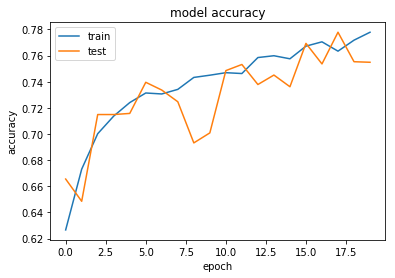

In [33]:
plt.plot(waste_train.history['acc'])
plt.plot(waste_train.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

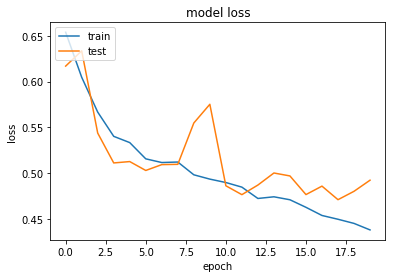

In [34]:
plt.plot(waste_train.history['loss'])
plt.plot(waste_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
johnnychan_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 36, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 24, 36, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 18, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 18, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 18, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 12, 18, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 9, 64)          0         
__________

In [ ]:
# johnnychan_model.save("johnnychan_model_dropout.h5py")

In [36]:
tensorboard("/tmp/convNet")

TypeError: 'TensorBoard' object is not callable

In [109]:
from keras.models import load_model
johnnychan_model = load_model('johnnychan_model_dropout.h5py')

In [129]:
train_X = np.load('Xmatrix.npy')
train_Y = np.load('Ylabels.npy')

train_X = train_X.reshape(-1, height, width, 3)
# test_X = test_X.reshape(-1, 24,36, 3)
train_X.shape

train_X = train_X.astype('float32')


train_X = train_X / 255.

In [99]:
print(train_X.shape)
test_X = test_X.reshape(-1, height, width, 3)
test_X = test_X / 255.
print(test_X.shape)

(4320, 224, 224, 3)
(864, 224, 224, 3)


In [110]:
k = johnnychan_model.predict(test_X)


ValueError: Error when checking input: expected conv2d_1_input to have shape (96, 144, 3) but got array with shape (224, 224, 3)

In [53]:
k[:,1]>0.5

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [100]:
sum((test_label[:,1] - k)==0) / len(test_label)

NameError: name 'k' is not defined

In [41]:
p = johnnychan_model.predict(train_X)

In [42]:
p = p[:,0]

In [43]:
numGrids = 12**2
counter = 0
for i in range (0, int(len(k) / numGrids)):
    votes = k[numGrids * i: numGrids * (i + 1)]
    if int(sum(votes)* 2 / numGrids) == train_Y[i * numGrids]:
        counter += 1
counter        


11

In [44]:
numGrids = 12**2

for i in range (0, int(len(k) / numGrids)):
    votes = k[numGrids * i: numGrids * (i + 1)]
    #if sum(votes) > numGrids / 2:
        #print(i, " Residential")
    #else:
        #print(i, " Nonresidential")

In [48]:
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [103]:
train_X[0:144].shape

(144, 224, 224, 3)

In [104]:
def voteMap(X, p, numGrids, job, graf):
    vmap = np.zeros((len(X[0]) * numGrids, (len(X[0][0])) * numGrids, 3))
    width = len(X[0][0])
    imgwidth = int(len(X[0][0]) * numGrids)
    height = len(X[0])
    imgheight = int(len(X[0]) * numGrids)
    cnt = 1
    if(graf):
        fig=plt.figure(figsize=(7.5, 5))
        plt.title('Votes')
    for i in range(0,imgheight,height):
        for j in range(0,imgwidth,width):
            colorVote = X[int(numGrids*i/len(X[0])) +int(j/len(X[0][0]))].reshape(height, width, -1)
            percentageCorrect = p[int(numGrids*i/len(X[0])) +int(j/len(X[0][0]))]

#            if job > 0:
#                if k[int(numGrids*i/len(X[0])) +int(j/len(X[0][0]))] == 0:
#                   colorVote[:] = (1, 0, 0)
#           else:
#               if k[int(numGrids*i/len(X[0])) +int(j/len(X[0][0]))] > 0:
#                   colorVote[:] = (1, 0, 0)
            if(job == 0):
                vmap[i:i+height, j:j+width,:] = colorVote * percentageCorrect
            else:
                vmap[i:i+height, j:j+width,:] = colorVote * percentageCorrect
            if(graf):
                temp = vmap[i:i+height, j:j+width,:]
                ax = fig.add_subplot(rows, columns, cnt)
                cnt += 1
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(temp)
    return vmap


In [105]:
import matplotlib as mpl
def voteColor(X, p, numGrids, job, graf):
    vmap = np.zeros((len(X[0]) * numGrids, (len(X[0][0])) * numGrids, 3))
    width = len(X[0][0])
    imgwidth = int(len(X[0][0]) * numGrids)
    height = len(X[0])
    imgheight = int(len(X[0]) * numGrids)
    cnt = 1
    if(graf):
        fig=plt.figure(figsize=(7.5, 5))
        plt.title('Votes')
    for i in range(0,imgheight,height):
        for j in range(0,imgwidth,width):
            colorVote = X[int(numGrids*i/len(X[0])) +int(j/len(X[0][0]))].reshape(height, width, -1)
            percentageCorrect = p[int(numGrids*i/len(X[0])) +int(j/len(X[0][0]))]

#            if job > 0:
#                if k[int(numGrids*i/len(X[0])) +int(j/len(X[0][0]))] == 0:
#                   colorVote[:] = (1, 0, 0)
#           else:
#               if k[int(numGrids*i/len(X[0])) +int(j/len(X[0][0]))] > 0:
#                   colorVote[:] = (1, 0, 0)
            colorVote[:] = mpl.cm.inferno(percentageCorrect)[0:3]
            colorVote[:] = (0, 1, 0)
            if(job < 1):
                vmap[i:i+height, j:j+width,:] = (1 - percentageCorrect, percentageCorrect, 0)
            else:
                vmap[i:i+height, j:j+width,:] = (percentageCorrect, 1 - percentageCorrect, 0)
            if(graf):
                temp = vmap[i:i+height, j:j+width,:]
                ax = fig.add_subplot(rows, columns, cnt)
                cnt += 1
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(temp)
    return vmap


In [106]:
def plotReconstruction(id):
    numGrids = 12
    X = np.copy(train_X[id*numGrids**2:(id+1)*numGrids**2])
    print(X.shape)
    fig=plt.figure(figsize=(15, 10))
    plt.subplot(221), plt.imshow(reconstructPic(X, numGrids)), plt.title("Original")
    plt.subplot(223), plt.imshow(voteMap(X, p[id*numGrids**2:(id+1)*numGrids**2], numGrids, train_Y[id * numGrids**2], False)), plt.title("Votes")
    plt.subplot(122), plt.imshow(voteColor(X, p[id*numGrids**2:(id+1)*numGrids**2], numGrids, train_Y[id * numGrids**2], False)), plt.title("Votes")
    print(sum(k[id*numGrids**2:(id+1)*numGrids**2] == train_Y[id * numGrids**2]), "/", numGrids**2, "correctly identified")
    print(sum(k[id*numGrids**2:(id+1)*numGrids**2] == train_Y[id * numGrids**2])/numGrids**2*100, "% Corresponding accuracy")

(0, 224, 224, 3)


IndexError: index 0 is out of bounds for axis 0 with size 0

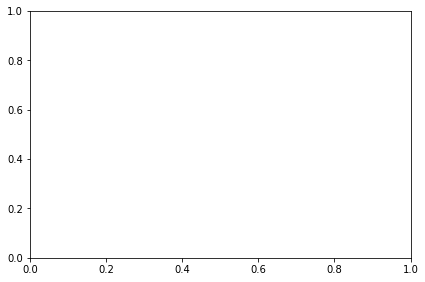

In [107]:
plotReconstruction(40)

In [ ]:
johnnychan_model

In [ ]:
# accuracy = fashion_train_dropout.history['acc']
# val_accuracy = fashion_train_dropout.history['val_acc']
# loss = fashion_train_dropout.history['loss']
# val_loss = fashion_train_dropout.history['val_loss']
# epochs = range(len(accuracy))
# plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
# plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.figure()
# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.legend()
# plt.show()

In [68]:
def plotVotes(id):
    X = np.copy(train_X[id*144:(id+1)*144])
    allVote = voteMap(X, k[id*144:(id+1)*144], 12, train_Y[id * 144], False)
    fig=plt.figure(figsize=(7.5, 5))
    columns = 12
    rows = 12
    plt.title('Votes')
    for i in range(1, columns*rows +1):
        row = int((i - 1)/rows)
        col = int((i - 1)%rows)
        img = allVote[row*96:row*96+96,col*144:col*144+144,:]
        ax = fig.add_subplot(rows, columns, i)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(img)
    plt.subplots_adjust(wspace=0.01, hspace=0.1)
    plt.savefig('example.png')
    plt.show()

In [58]:
train_X = np.load('Xmatrix.npy')
train_Y = np.load('Ylabels.npy')

train_X = train_X.reshape(-1, 96,144, 3)
# test_X = test_X.reshape(-1, 24,36, 3)
train_X.shape

train_X = train_X.astype('float32')


train_X = train_X / 255.

In [138]:
interact(lambda lam: plotReconstruction(lam), lam=(0, 102))

interactive(children=(IntSlider(value=51, description='lam', max=102), Output()), _dom_classes=('widget-intera…

<function __main__.<lambda>(lam)>

In [ ]:
X = train_X

In [ ]:
from keras import backend as K
get_3rd_layer_output = K.function([johnnychan_model.layers[0].input],
                                  [johnnychan_model.layers[2].output])

In [ ]:
johnnychan_model.layers[0]

In [ ]:
X[3000].shape
plt.imshow(X[2510])
plt.show()

In [ ]:
layer_output = get_3rd_layer_output([X[3000:3001]])[0]
layer_output.shape

In [ ]:
johnnychan_model.layers

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
batch_size = 64
epochs = 40
num_classes = 2

johnnychan_model = Sequential()
johnnychan_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(96,144,3)))
johnnychan_model.add(LeakyReLU(alpha=0.1))
johnnychan_model.add(MaxPooling2D((2, 2),padding='same'))
johnnychan_model.add(Dropout(0.25))
johnnychan_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
johnnychan_model.add(LeakyReLU(alpha=0.1))
johnnychan_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
johnnychan_model.add(Dropout(0.25))
johnnychan_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
johnnychan_model.add(LeakyReLU(alpha=0.1))                  
johnnychan_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
johnnychan_model.add(Dropout(0.4))
johnnychan_model.add(Flatten())
johnnychan_model.add(Dense(128, activation='linear'))
johnnychan_model.add(LeakyReLU(alpha=0.1))           
johnnychan_model.add(Dropout(0.3))
johnnychan_model.add(Dense(num_classes, activation='softmax'))
johnnychan_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

from keras.models import load_model
johnnychan_model = load_model('C:\\Users\\USER\\Desktop\\johnnychan_model_dropout.h5py')
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])